In [1]:
import pandas as pd
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import numpy as np

import math
from numpy import matmul 
from numpy.linalg import inv

from scipy.linalg import lstsq

In [4]:
# ПРецессия гироскопа и гироскопического эффекта 
g=9.8

time_array= np.array([5.73, 4.26, 3.98, 2.28])
# массив угловых скоростей вращения 
angle_speed_ar=[]
for it in time_array:
    angle_speed_ar.append(2*math.pi/it)
print('angle speed array', angle_speed_ar)
l0=0
l1=63*(10**(-3))
l2=71*(10**(-3))

# m0=const 

m1=35*(10**(-3))
m2=40*(10**(-3))
w0=angle_speed_ar[0]
w1=angle_speed_ar[1]
w2=angle_speed_ar[2]

H = ((m2*g*l2)-(m1*g*l1))/(w1-w2)
print(' собств кинетический момент гироскопа = ', H)



angle speed array [1.0965419384257566, 1.4749261284459123, 1.578689775673263, 2.755783029464731]
 собств кинетический момент гироскопа =  -0.05997283409251347


[-0.05755927  0.00644351]
собственный кинетический момент (мнк)=  -0.05755926949742321
(3,) (3,)


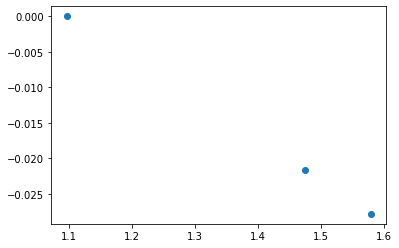

In [12]:
from numpy import matmul 
from numpy.linalg import inv
# new mnk 
A = np.array([[w0, w1, w2], [g]*3]).transpose()
b = np.array([0, -m1*g*l1, -m2*g*l2])

Mnk_mat=matmul(matmul(inv(matmul(A.T,A)),A.T),b)
print(Mnk_mat)
H_ = Mnk_mat[0]
print('собственный кинетический момент (мнк)= ',H_)

A_=A[:,0] 

plt.plot(A_, b, 'o', label='data')
plt.show()



In [15]:

w4=angle_speed_ar[3]
print (' угловая скорость прецессии увеличилась с ',w1,'\n до ', w4, ' Гц  без груза')

 угловая скорость прецессии увеличилась с  1.4749261284459123 
 до  2.755783029464731  Гц  без груза


In [16]:
# ф-я для составления матрицы из двух массивов
def make_array(w,v):
    data = np.transpose(np.array([w,v]))
    return data[data[:,0].argsort()]

w1 [0.00872665 0.01308997 0.01745329 0.02181662 0.02617994 0.05235988
 0.07853982 0.10471976] 
 v1= [ 0.85  1.3   1.75  2.    2.5   5.    7.   10.  ]
koeff=  [93.69426237] 
 res= 0.19681657848324524 
 rnk=  1 
 s= [0.14693454]


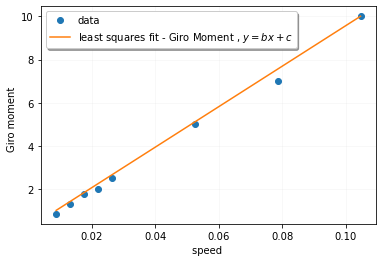

In [17]:
# Датчик угловой скорости - гиротахометр 

ang1 = 15  # град - угол наклона гироскопа
ang1_rad = math.radians(ang1) 
# скорость вращения в  град/с
w1 = [ 6, 4.5, 3, 1.5, 1.25, 1, 0.75, 0.5] 

# напряжение - гироскопический момент 
v1 = [ 10, 7, 5, 2.5,  2.0, 1.75, 1.3, 0.85] 
data15 = make_array(w1,v1)

w1= (math.pi/180)*data15[:,0]
v1=data15[:,1]
print('w1',w1,'\n v1=',v1)

plt.plot(w1, v1, 'o', label='data')


Matrix = w1[:, np.newaxis]
koeff1, res, rnk, s = lstsq(Matrix , v1) 
print('koeff= ',koeff1,'\n res=', res,"\n rnk= ", rnk,'\n s=', s)

yy = float(koeff1[0]) * w1 + res
Giro15=yy*ang1_rad
plt.plot(w1, yy, label='least squares fit - Giro Moment , $y = bx +c  $')



plt.xlabel('speed ')
plt.ylabel('Giro moment  ')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.1)
plt.show()



w1 [0.00363028 0.00436332 0.00872665 0.01308997 0.01745329 0.02181662
 0.02617994 0.05235988] 
 v1= [ 0.85  1.3   1.75  2.    2.5   5.    7.   10.  ]
koeff=  [178.12345648] 
 res= 0.1987706896940309 
 rnk=  1 
 s= [0.06698692]


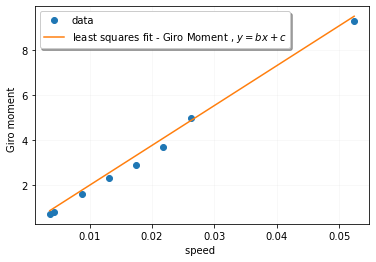

наклон мнк для 15 градусов = 93.694262371305 
 наклон мнк для 60 градусов =  178.12345647987527


In [18]:
# угол между осью ротора и осью вращения платформы равен α = 60 град;
ang2 = 60
ang2_rad = math.radians(ang2) 
w2 = [   3, 1.5, 1.25,   1, 0.75, 0.5, 0.25, 0.208]
v2 = [ 9.3, 5,  3.7, 2.9,  2.3, 1.6,  0.8,     0.7]

data60 = make_array(w2,v2)

w2= (math.pi/180)*data60[:,0]
v2=data60[:,1]
print('w1',w2,'\n v1=',v1)

plt.plot(w2, v2, 'o', label='data')


Matrix = w2[:, np.newaxis]
koeff2, res, rnk, s = lstsq(Matrix , v2) 
print('koeff= ',koeff2,'\n res=', res,"\n rnk= ", rnk,'\n s=', s)

yy = float(koeff2[0]) * w2 + res
Giro60=yy*ang2_rad
plt.plot(w2, yy, label='least squares fit - Giro Moment , $y = bx +c  $')



plt.xlabel('speed ')
plt.ylabel('Giro moment  ')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.1)
plt.show()



 Зависимость Гироскопического момента от угловой скорости вращения платформы для углов 15 и 60  
 между осью ротора и осью вращения платформы       


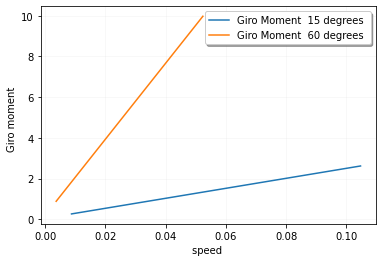

наклон мнк для 15 градусов = 93.694262371305 
 наклон мнк для 60 градусов =  178.12345647987527 соотношение  0.5260074345227562
 теоритическое соотношение коэффициентов наклона  0.2988584907226845


In [21]:
# G = H * w * sin (alpha) 

print ( ' Зависимость Гироскопического момента от угловой скорости вращения платформы для углов 15 и 60  \n между осью ротора и осью вращения платформы       ')
plt.plot(w1, Giro15, label='Giro Moment  15 degrees ')
plt.plot(w2, Giro60, label='Giro Moment  60 degrees ')



plt.xlabel('speed ')
plt.ylabel('Giro moment  ')
plt.legend(framealpha=1, shadow=True)
plt.grid(alpha=0.1)
plt.show()

k1=koeff1[0]
k2=koeff2[0]
k1_2=k1/k2
print ('наклон мнк для 15 градусов =', k1,'\n наклон мнк для 60 градусов = ', k2, 'соотношение ',k1_2) 

# Г = H x w x sin (a)
k_ter=math.sin(ang1_rad)/math.sin(ang2_rad)
print ( ' теоритическое соотношение коэффициентов наклона ',k_ter )
